# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [65]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = bs(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_="table")
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        id = columns[0].text.strip()
        terrestrial_date = columns[1].text
        sol = columns[2].text
        ls = columns[3].text
        month = columns[4].text
        min_temp = columns[5].text
        pressure = columns[6].text

        df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
        

/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol, 'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure}, ignore_index=True)
/var/folders/0t/q2dcpyt9513bblvr3rc_k6l00000gn/T/ipykernel_20194/2534676650.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

In [13]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [25]:
# Change data types for data analysis
df = df.astype({'sol':'float','ls':'float', 'month':'int32', 'min_temp':'float', 'pressure':'float'})

In [26]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                   object
terrestrial_date     object
sol                 float64
ls                  float64
month                 int32
min_temp            float64
pressure            float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
df['month'].nunique()

12

In [28]:
# 2. How many Martian days' worth of data are there?
df['sol'].nunique()

1867

In [40]:
# 3. What is the average low temperature by month?
mean_month_temp = df.groupby(['month']).mean()['min_temp'].sort_values(ascending=True)
mean_month_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

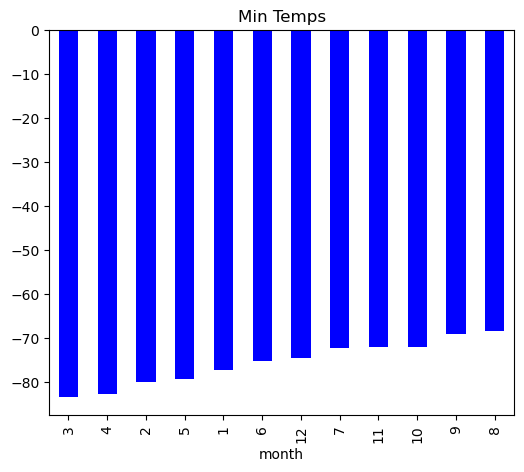

In [39]:
# Plot the average temperature by month
mean_month_temp.plot(kind = "bar", facecolor = "blue", figsize = (6,5), title = "Min Temps")
plt.show()


In [43]:
# Identify the coldest and hottest months in Curiosity's location
mean_month_temp.min()
mean_month_temp.max()

-68.38297872340425

In [44]:
# 4. Average pressure by Martian month
mean_month_pressure = df.groupby(['month']).mean()['pressure'].sort_values(ascending=True)

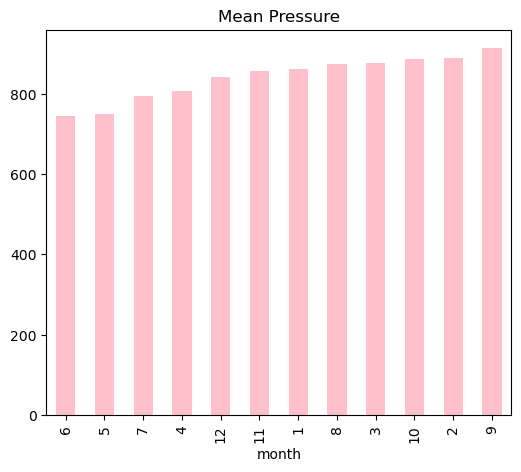

In [45]:
# Plot the average pressure by month
mean_month_pressure.plot(kind = "bar", facecolor = "pink", figsize = (6,5), title = "Mean Pressure")
plt.show()

In [46]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['ls'].min()

0.0

In [47]:
df['ls'].max()

359.0

In [63]:
#We substract Earth Date in ls=359, minus Earth Date in ls=0.
df.loc[df['ls'] == 359]['terrestrial_date']

302     2013-07-30
303     2013-07-31
923     2015-06-17
924     2015-06-18
1577    2017-05-04
1578    2017-05-05
Name: terrestrial_date, dtype: object

In [64]:
df.loc[df['ls'] == 0]['terrestrial_date']

304     2013-08-01
305     2013-08-02
925     2015-06-19
926     2015-06-20
1579    2017-05-06
1580    2017-05-07
Name: terrestrial_date, dtype: object

In [68]:
#1 year in Mars is approximately the difference between 2015-06-20 and 2013-07-30
date_1 = dt.datetime(2013, 7, 30)
date_2 = dt.datetime(2015, 6, 20)
days = date_2 - date_1
days

datetime.timedelta(days=690)

In [54]:
daily_min = df.groupby(['sol']).mean()['min_temp']
daily_min

sol
10.0     -75.0
11.0     -76.0
12.0     -76.0
13.0     -74.0
14.0     -74.0
          ... 
1973.0   -78.0
1974.0   -77.0
1975.0   -76.0
1976.0   -77.0
1977.0   -77.0
Name: min_temp, Length: 1867, dtype: float64

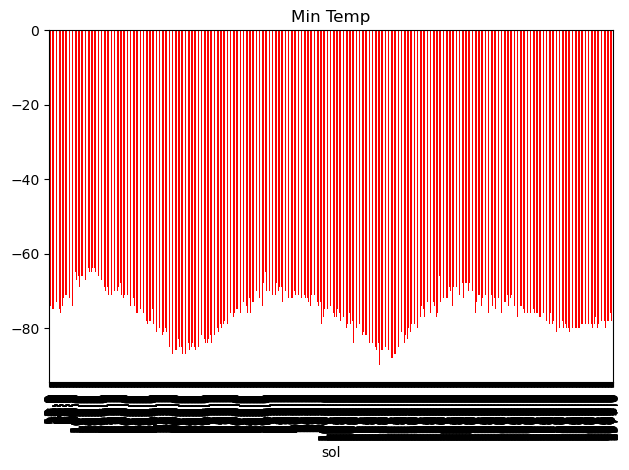

In [59]:
daily_min.plot(kind = "bar", facecolor = "red", title = "Min Temp")
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
df.to_csv('/Users/aldosilva/Downloads/Starter_Code/mars_temps.csv')

In [70]:
browser.quit()